This script aims to inspect portfolio metrics, based on evaluation functions written in the funcs.py script, as well as give an overview of all the useful metrics we can use to construct an optimal portfolio.

In [9]:
from funcs import *
import os
import pandas as pd
from pathlib import Path
mp = Path.cwd().parent/"data"
print(mp)



/home/tobiasocula/Documents/projects/ml-finance/ML-for-finance/main/data


Load asset data and create portfolios. We create weights randomly per portfolio.

In [10]:
tickers = ['SPY', 'VGK', 'GLD', 'EEM', 'VWO', 'QQQ']
N = len(tickers)
p = 20
T = 30

returns = pd.DataFrame(np.random.uniform(0, 1, (T,N))).to_numpy() # (T x N matrix)
weights = np.random.dirichlet(np.ones(N), size=p) # (p x N matrix)


Plot returns per portfolio

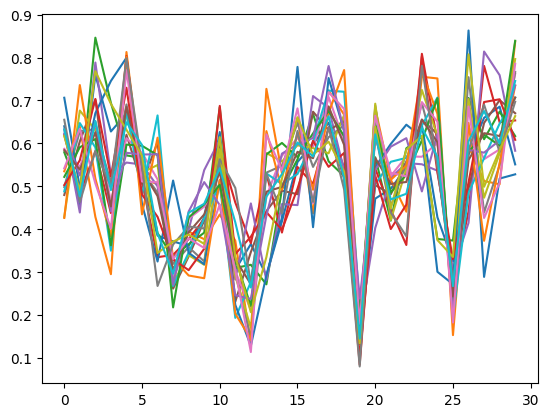

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

total_returns = np.matmul(returns, weights.T) # (T x p matrix)
for i in range(p):
    ax.plot(total_returns[:,i])

plt.show()

Here we compute, per portfolio, some measures of risk and performance.  
Sharpe ratio = $\frac{\mu^Tw-r}{\sigma}$  
Sortino ratio = $\frac{\mu^Tw-r}{\sigma_d}$  
Portfolio variance = $w^T\Sigma w$  
Effective number of bets = $\frac{(\sum_i\lambda_i)^2}{\sum_i\lambda_i^2}$  
Effective number of bets = $-\sum_i\lambda_i\text{ln}(\lambda_i)$  
Where $\mu$ is the mean return vector, $w$ is the weights vector, and the $\lambda_i$ are normalized eigenvectors of the covariance matrix $\Sigma$.


In [12]:
# covariance matrix of returns (N x N)
cov = np.cov(returns.T)

p_metrics = np.empty(shape=(p,5)) # 5 different metrics

for i in range(p):

    sharpe_ratio = sharpe(weights[i,:], returns)
    sortino_ratio = sortino(weights[i,:], returns)
    variance = portfolio_variance(weights[i,:], cov)
    n_of_risk_factors = ENB1(weights[i,:], returns)
    effective_number_of_bets = ENB3(weights[i,:], returns)

    p_metrics[i,0] = sharpe_ratio
    p_metrics[i,1] = sortino_ratio
    p_metrics[i,2] = variance
    p_metrics[i,3] = n_of_risk_factors
    p_metrics[i,4] = effective_number_of_bets

p_metrics = pd.DataFrame(p_metrics, columns=["sharpe", "sortino", "variance", "enb1", "enb2"])
print(p_metrics)



      sharpe  sortino  variance      enb1      enb2
0   3.469217      inf  0.020971  5.131935  1.702754
1   2.683983      inf  0.036580  5.131935  1.702754
2   3.217356      inf  0.025107  5.131935  1.702754
3   3.163531      inf  0.025301  5.131935  1.702754
4   3.288798      inf  0.024053  5.131935  1.702754
5   3.453998      inf  0.021850  5.131935  1.702754
6   3.616461      inf  0.020516  5.131935  1.702754
7   3.137292      inf  0.026747  5.131935  1.702754
8   3.049738      inf  0.028528  5.131935  1.702754
9   3.160183      inf  0.026107  5.131935  1.702754
10  2.458839      inf  0.040546  5.131935  1.702754
11  2.647757      inf  0.036441  5.131935  1.702754
12  3.341263      inf  0.024501  5.131935  1.702754
13  3.258446      inf  0.023707  5.131935  1.702754
14  3.488693      inf  0.022088  5.131935  1.702754
15  3.738167      inf  0.018708  5.131935  1.702754
16  2.907661      inf  0.030965  5.131935  1.702754
17  3.171699      inf  0.025485  5.131935  1.702754
18  3.156917

<h2>Optimalization of portfolios</h2>

We will now determine optimal weights for a portfolio, given some optimalization metric.

### Optimizing for Sharpe ratio  
Given the mean return vector $\mu$ and the covariance matrix $\Sigma$ of the portfolio, we will maximize the function $L:\mathbb{R}^N\rightarrow\mathbb{R}$ given by  
$L(w)=\frac{\mu^T w-r}{\sqrt{w^T\Sigma w}}$  
where we want the weights to add up to one and where $r$ is the risk-free rate. The numerator is the net return and the denominator is the standard deviation of returns.  
### Optimizing for Sortino ratio  
We do the same thing, but now the denominator of the previously given function, for the Sortino ratio, consists of the standard deviation of downside returns.  
### Risk parity minimizing   
Using this method, we aim to find weights such that we allocate an equal measure of risk to every asset allocation. We do this by minimizing the loss function  
$f(w)=\sum_{i=1}^{n}(\frac{w_i\Sigma w^T}{\sigma}-\frac{\sigma}{n})^2$  
where $\Sigma$ is the covariation matrix of returns and $w$ the input weights (sum to one), and $n$ the amount of assets.


Inequality constraints incompatible    (Exit mode 4)
            Current function value: inf
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
weights:;; [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
weights:;; [0.16666668 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
weights:;; [0.16666667 0.16666668 0.16666667 0.16666667 0.16666667 0.16666667]
weights:;; [0.16666667 0.16666667 0.16666668 0.16666667 0.16666667 0.16666667]
weights:;; [0.16666667 0.16666667 0.16666667 0.16666668 0.16666667 0.16666667]
weights:;; [0.16666667 0.16666667 0.16666667 0.16666667 0.16666668 0.16666667]
weights:;; [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666668]
weights:;; [0.16579664 0.16682033 0.16930208 0.16550996 0.167265   0.16530598]
weights:;; [0.16579666 0.16682033 0.16930208 0.16550996 0.167265   0.16530598]
weights:;; [0.16579664 0.16682035 0.16930208 0.16550996 0.167265   0.16530598]
weights:;; [0.16579

/home/tobiasocula/Documents/projects/ml-finance/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


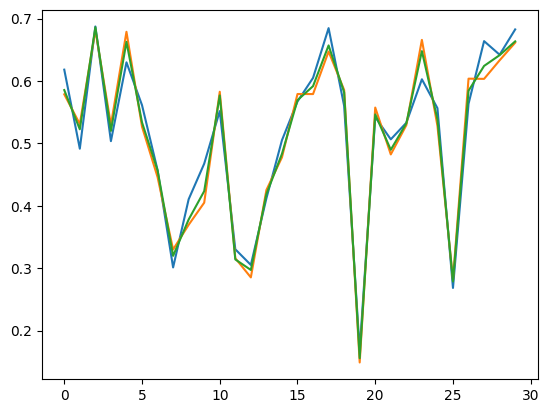

In [16]:
optimal_weights_sharpe = optimize_sharpe(returns)
optimal_weights_sortino = optimize_sortino(returns)
optimal_weights_risk_parity = risk_parity(returns)

fig, ax = plt.subplots()

returns_sharpe = np.matmul(returns, optimal_weights_sharpe)
returns_sortino = np.matmul(returns, optimal_weights_sortino)
returns_risk_parity = np.matmul(returns, optimal_weights_risk_parity)

ax.plot(returns_sharpe)
ax.plot(returns_sortino)
ax.plot(returns_risk_parity)

plt.show()


#### Constructing the efficient frontier

Out of all the portfolios, we will pick the one with the highest sharpe ratio. We will also plot the relationship between the std of returns and the excess returns.



0.5023887941437747
0.1448132888386171
0.5133326086359228
0.19125774813445828
0.5097966368774477
0.15845204080177763
0.5031971468078348
0.1590618466547196
0.5100554978570288
0.15508874036010642
0.5105608961027646
0.14781737625657498
0.5179971633597306
0.14323317076108025
0.513091530332308
0.163545985468719
0.5151086977048969
0.16890261690439304
0.5106096070410545
0.1615759363404129
0.4951100716801812
0.2013592621884321
0.5054437647799287
0.19089503766378857
0.5230052356079886
0.15652920615950724
0.5017079946126342
0.15397156580329938
0.5184848228059873
0.1486186640241707
0.5112919601180436
0.13677610630122272
0.5116559081952237
0.17596822507093826
0.5063279849249299
0.15963935931710926
0.5104025022656098
0.16167749486476077
0.5158789079429956
0.13939780398660936


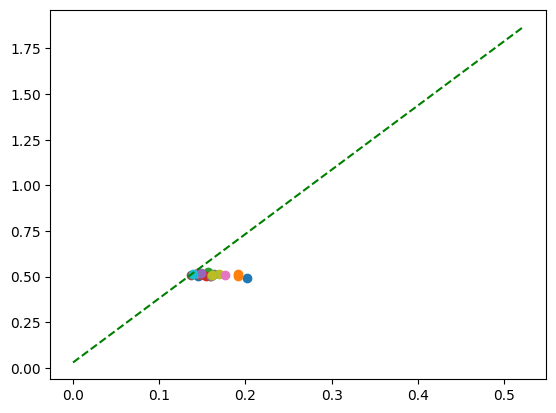

In [ ]:
fig, ax = plt.subplots()

best_sharpe = 0
rs = []

riskfree = 0.03 # eg. 3%

for i in range(p):
    total_return, std = portfolio_performance(returns, weights[i,:])
    rs.append(total_return)
    sharpe = (total_return - riskfree) / std
    if best_sharpe < sharpe:
        best_sharpe = sharpe
    ax.scatter(std, total_return)


x_vals = np.linspace(0, max(rs), 100)
cml = riskfree + best_sharpe * x_vals
ax.plot(x_vals, cml, label="Capital Market Line (CML)", linestyle='--', color='green')

plt.show()